### Normalized Pricing 

Looking into how to break down the price of products on a unit volume (liter) level to make comprehension of sales easier. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',95)
pd.set_option('display.max_rows',None)
import pickle
import re
import datetime
import seaborn as sns

In [2]:
# Opening the pickled file
f = open('df5.pkl', 'rb')
df5 = pickle.load(f)
f.close()

In [3]:
df5.columns

Index(['invoice/item_number', 'date', 'store_number', 'city', 'zip_code',
       'county_number', 'county', 'item_number', 'item_description',
       'state_bottle_cost', 'state_bottle_retail', 'bottles_sold',
       'sale_dollars', 'volume_sold_liters', 'store_name', 'cat_name',
       'open_store', 'store_type'],
      dtype='object')

In [ ]:
df5.info()

In [ ]:
df5.isna().sum()

In [4]:
df5['volume_sold_liters'] = df5['volume_sold_liters'].fillna(0.0)

In [ ]:
df5.isna().sum()

In [ ]:
df5.info()

In [5]:
df5['ppl'] = round((df5['sale_dollars']/df5['volume_sold_liters']), 2)

In [41]:
# Grouping by quarter and sales
# quarter = df5.groupby([pd.Grouper(key='date', freq='Q')])['sale_dollars'].sum().reset_index()
# qtr = df5[['volume_sold_liters','sale_dollars','date']].groupby([pd.Grouper(key='date', freq='Q')])['sale_dollars'].sum().reset_index()
qtr1 = df5.groupby([pd.Grouper(key='date')])['sale_dollars', 'volume_sold_liters'].sum().reset_index()

In [ ]:
# Adding ppl which is price per liter to normalize sales from the effect of size/volume
qtr1['ppl'] = round((qtr1['sale_dollars']/qtr1['volume_sold_liters']), 2)

In [ ]:
qtr1.head()

In [6]:
df5['year'] = pd.to_datetime(df5['date']).dt.year
df5['quarter'] = pd.to_datetime(df5['date']).dt.quarter

In [42]:
q = df5.groupby('quarter')['sale_dollars', 'volume_sold_liters'].sum().reset_index()

In [43]:
q['ppl'] = round((q['sale_dollars']/q['volume_sold_liters']), 2)

In [ ]:
q.head()

In [ ]:
q.info()

In [44]:
q['quarter'] = q['quarter'].astype('category')

In [ ]:
q.info()

In [45]:
# Renaming quarters from integers to descriptive seasons
# q['quarter'] = q.replace({'quarter' : { '1' : 'spring', '2' : 'summer', '3' : 'fall','4':'winter' }})
q['quarter'] = q['quarter'].replace(1, 'spring')
q['quarter'] = q['quarter'].replace(2, 'summer')
q['quarter'] = q['quarter'].replace(3, 'fall')
q['quarter'] = q['quarter'].replace(4, 'winter')

Text(0, 0.5, 'price per liter $')

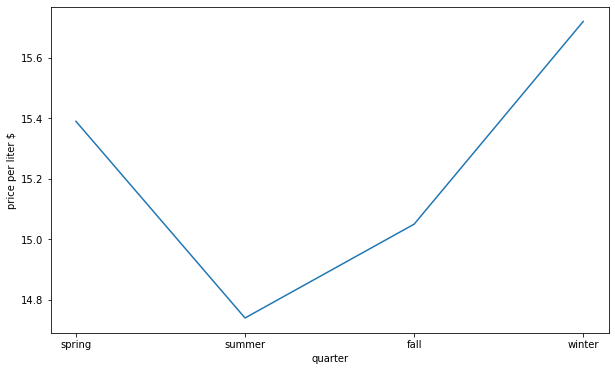

In [46]:
fig, ax = plt.subplots(figsize =(10, 6))
sns.lineplot(data = q, x = 'quarter', y = 'ppl')
# plt.title('Seasonal Average Price Per Liter of Liquor Products')
plt.ylabel('price per liter $')

In [47]:
# Looking at price per liter by liquor category
cat_ppl = df5.groupby('cat_name')['sale_dollars', 'volume_sold_liters'].sum().reset_index()

In [48]:
cat_ppl['ppl'] = round((cat_ppl['sale_dollars']/cat_ppl['volume_sold_liters']), 2)

In [49]:
cat_ppl = cat_ppl.sort_values(by = 'ppl', ascending = False)
cat_ppl

,cat_name,sale_dollars,volume_sold_liters,ppl
0,accessories,3.797746e+07,1.495292e+06,25.40
1,brandy,1.227859e+08,5.436627e+06,22.58
11,tequila,1.592540e+08,7.063459e+06,22.55
3,cordials liqueurs,1.929175e+08,9.990832e+06,19.31
13,whiskey,9.843450e+08,5.588516e+07,17.61
6,grain alcohol,2.966947e+06,1.693023e+05,17.52
7,rum,3.301994e+08,2.305438e+07,14.32
5,gin,7.037371e+07,4.970598e+06,14.16
8,schnapps,9.289055e+07,6.671796e+06,13.92
9,special orders,8.442108e+06,6.446106e+05,13.10


Text(0, 0.5, 'category name')

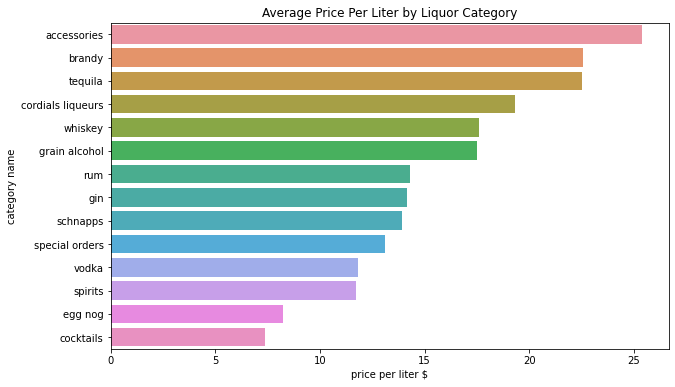

In [50]:
fig, ax = plt.subplots(figsize =(10, 6))
sns.barplot(data = cat_ppl, x = 'ppl', y = 'cat_name')
plt.title('Average Price Per Liter by Liquor Category')
plt.xlabel('price per liter $')
plt.ylabel('category name')

In [ ]:
cat_ppl.to_csv('price_per_liter.csv')

In [ ]:
cat_ppl.shape

In [ ]:
cat_ppl.head()

In [ ]:
df5.columns

In [8]:
df5.shape

(20095649, 21)

In [ ]:
df5['ppl'] = round((df5['sale_dollars']/df5['volume_sold_liters']), 2)

In [7]:
df5.head()

,invoice/item_number,date,store_number,city,zip_code,county_number,county,item_number,item_description,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,store_name,cat_name,open_store,store_type,ppl,year,quarter
0,S04763500007,2012-03-27,2534,urbandale,50322,77.0,Polk,11788,black velvet,NaN,NaN,6.0,94.02,10.50,hy-vee drugtown / urbandale,whiskey,closed,supermarket,8.95,2012,1
1,S27474100012,2015-08-25,4924,nashua,50658,19.0,Chickasaw,89194,jose cuervo especial reposado flask,NaN,NaN,4.0,33.00,1.50,abby lea's,tequila,closed,retail store,22.00,2015,3
2,S10731000040,2013-02-21,4652,davenport,52803,82.0,Scott,34449,ketel one citroen,NaN,NaN,2.0,40.48,1.50,brady mart food & liquor,vodka,open,convenience store,26.99,2013,1
3,S17037900080,2014-01-27,4794,burlington,52601,29.0,Des Moines,32236,seagrams extra dry gin,NaN,NaN,1.0,8.99,0.75,smokin' joe's #17 tobacco and liquor outlet,gin,open,retail store,11.99,2014,1
4,S14396900023,2013-09-09,2647,cedar rapids,52411,57.0,Linn,13038,canadian reserve whisky,NaN,NaN,6.0,80.94,10.50,hy-vee #7 / edgewood cedar rapids,whiskey,open,supermarket,7.71,2013,3


In [10]:
# Selecting some of the categories (not all)
df5_box = df5[(df5['cat_name']=='whiskey')|(df5['cat_name']=='vodka')|(df5['cat_name']=='egg nog')|(df5['cat_name']=='tequila')|(df5['cat_name']=='rum')|(df5['cat_name']=='brandy')]

In [37]:
df5_box = df5_box[(df5['ppl']<50)]

In [ ]:
df5.shape

In [11]:
drop_col= ['invoice/item_number', 'date', 'store_number', 'city', 'zip_code',
       'county_number', 'county', 'item_number', 'item_description',
       'state_bottle_cost', 'state_bottle_retail', 'bottles_sold',
       'volume_sold_liters', 'store_name', 'open_store', 'store_type',
       'year', 'quarter']

df5_box.drop(columns = drop_col,inplace=True)

In [30]:
df5_box.shape

(15032242, 3)

In [13]:
df5_box.columns

Index(['sale_dollars', 'cat_name', 'ppl'], dtype='object')

In [ ]:
df5_box.tail()

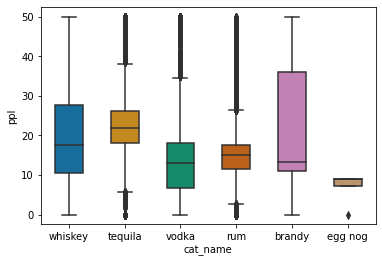

In [39]:
# make boxplot with Seaborn
bplot=sns.boxplot(y='ppl', x='cat_name', 
                 data=df5_box, 
                 width=0.5,
                 palette="colorblind")

# bplot=sns.swarmplot(y='ppl', x='cat_name',
#               data=df5_box, 
#               color='black',
#               alpha=0.75)

In [40]:
plot_file_name="boxplot.jpg"
bplot.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)